In [1]:
import pandas as pd
data = pd.read_csv('../data/raw_analyst_ratings.csv')
framed_data = pd.DataFrame(data)
print(framed_data.head())
print(framed_data.info())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [ ]:
pip install --upgrade pip


In [10]:
framed_data['headline_length'] = framed_data['headline'].apply(len)
print(framed_data.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  headline_length  
0  2020-06-05 10:30:54-04:00     A               39  
1  2020-06-03 10:45:20-04:00    

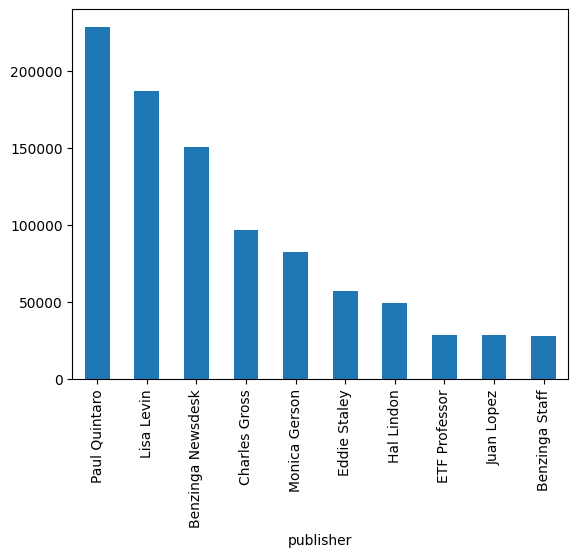

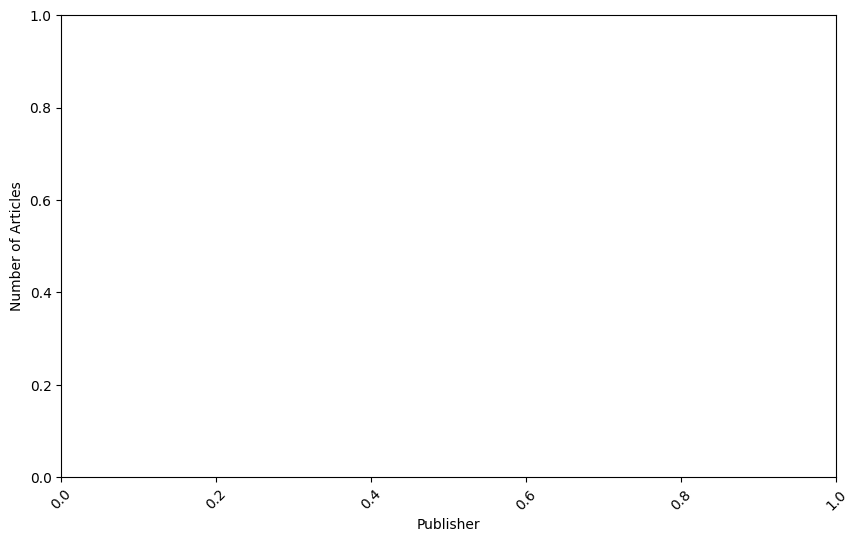

In [8]:
publisher_counts = framed_data['publisher'].value_counts()
publisher_counts.head(10).plot(kind='bar')
plt.figure(figsize=(10, 6))
# publisher_counts.plot(kind='bar', title='Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [5]:
framed_data['date'] = pd.to_datetime(framed_data['date'], errors='coerce')

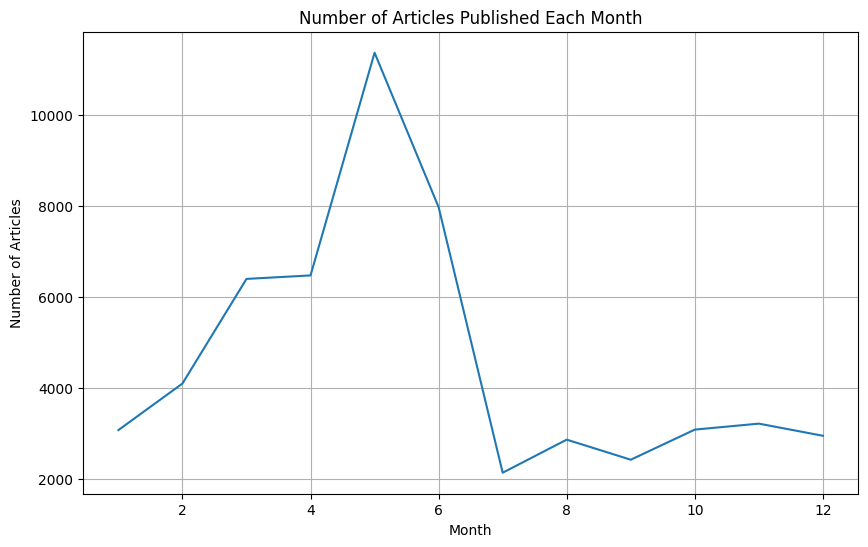

In [20]:
import matplotlib.pyplot as plt
# Extract date components
framed_data['year'] = framed_data['date'].dt.year
framed_data['month'] = framed_data['date'].dt.month
framed_data['day'] = framed_data['date'].dt.day
framed_data['week'] = framed_data['date'].dt.isocalendar().week
framed_data['hour'] = framed_data['date'].dt.hour

# Group by different components and count the number of articles
daily_count = framed_data.groupby('day').size()
weekly_count = framed_data.groupby('week').size()
monthly_count = framed_data.groupby('month').size()
hourly_counts = framed_data.groupby(framed_data['date'].dt.hour).size()


# Plot monthly article count
plt.figure(figsize=(10, 6))
monthly_count.plot()
plt.title('Number of Articles Published Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()





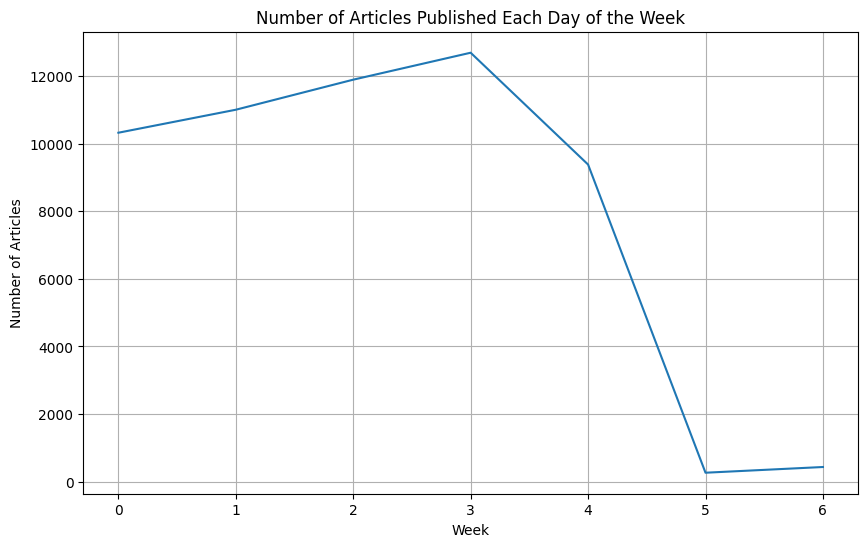

In [16]:
# Plot weekly article count
plt.figure(figsize=(10, 6))
weekly_count.plot()
plt.title('Number of Articles Published Each Day of the Week')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

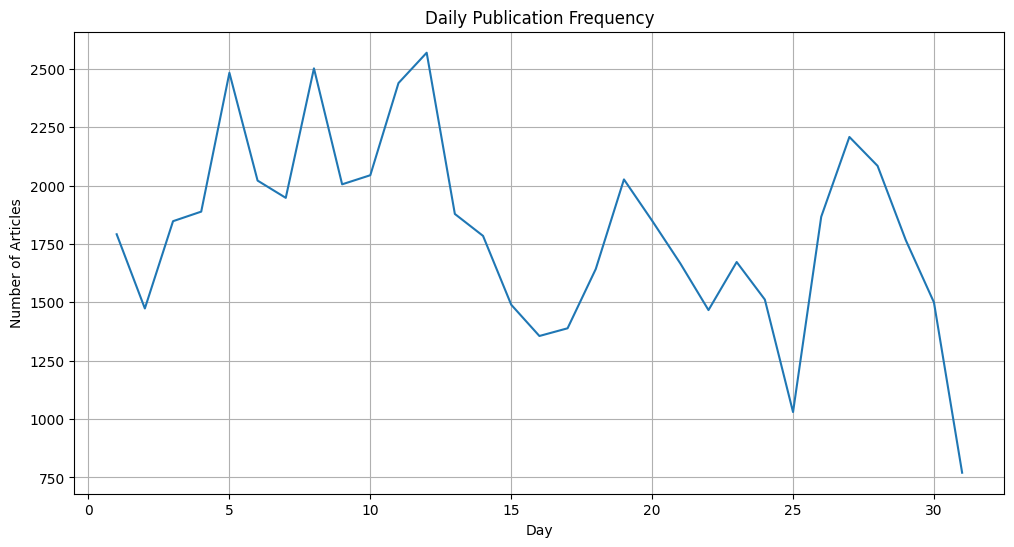

In [14]:
# Plot daily publication counts
plt.figure(figsize=(12, 6))
daily_count.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

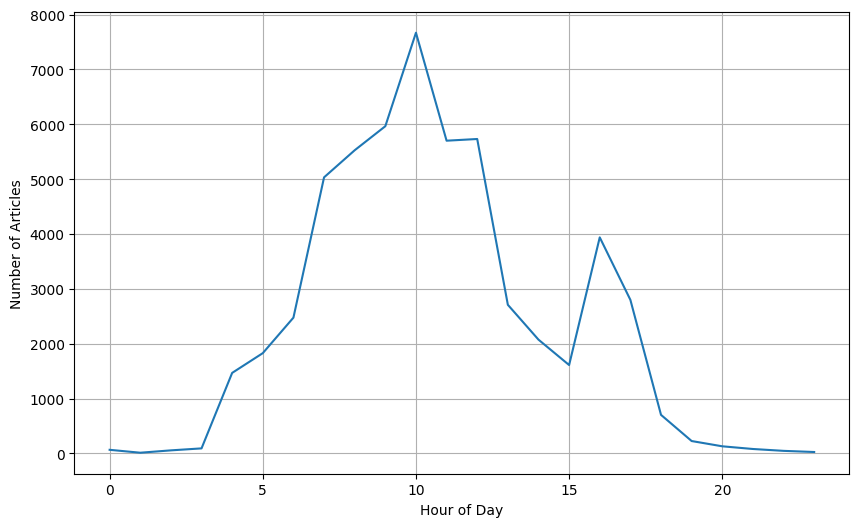

In [13]:
plt.figure(figsize=(10, 6))
hourly_counts.plot()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [3]:
# Extract domain names from email addresses
framed_data['domain'] = framed_data['publisher'].str.extract(r'@([\w.-]+)')

# Count the number of articles per domain
domain_counts = framed_data['domain'].value_counts()

# Display the top domains
top_domains = domain_counts.head(10)
print("Top 10 Domains by Article Count:")
print(top_domains)


Top 10 Domains by Article Count:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


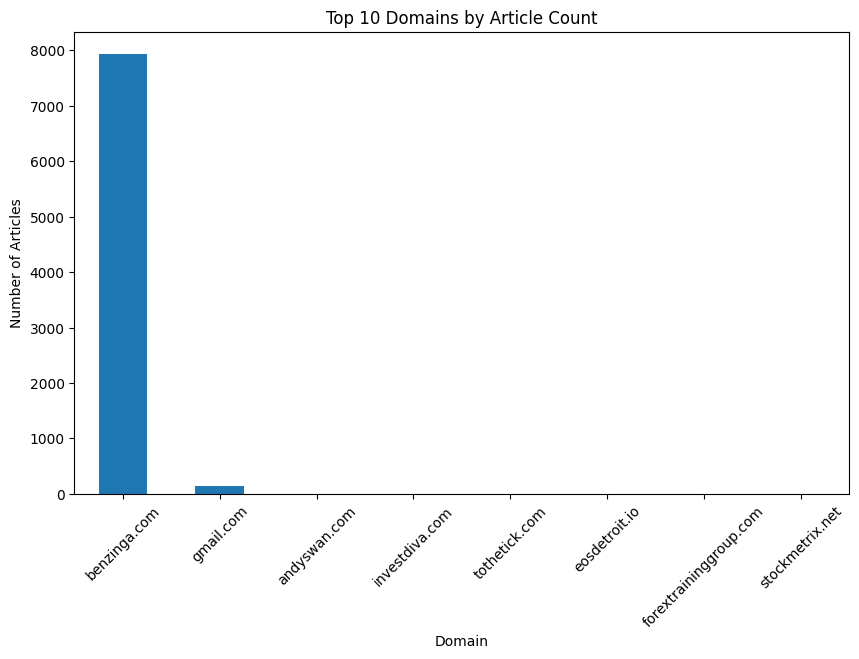

In [5]:
# Plot the top domains
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_domains.plot(kind='bar', title='Top 10 Domains by Article Count')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
